## scipy
SciPy库依赖于NumPy，它提供了便捷且快速的N维数组操作。 SciPy库的构建与NumPy数组一起工作，并提供了许多用户友好和高效的数字实践，例如:数值积分和优化的例程。 它们一起运行在所有流行的操作系统上，安装快速且免费。 NumPy和SciPy易于使用，但强大到足以依靠世界上一些顶尖的科学家和工程师。

### 安装
pip install scipy



### 保存和读取文件

In [1]:
from scipy import io              #导入io
import numpy as np                #导入numpy并命名为np    
arr = np.array([1,2,3,4,5,6])

#保存文件
#io.savemat('name',{dict})
io.savemat('test.mat',{'arr1':arr})
loadArr=io.loadmat('test.mat')


In [2]:
#读取文件
#io.loadmat('name')
data = io.loadmat('test.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Jul 29 08:53:46 2019',
 '__version__': '1.0',
 '__globals__': [],
 'arr1': array([[1, 2, 3, 4, 5, 6]])}

### scipy.stats中的统计函数分析随机数


In [3]:
from scipy import stats  
# stats提供了产生连续性分布的函数 
# 均匀分布（uniform） 
x=stats.uniform.rvs(size = 20)
#生成20个[0,1]均匀分布随机数 

# -正态分布（norm） 
x=stats.norm.rvs(size = 20)
#生成20个正态分布随机数 

# -贝塔分布（beta） 
x=stats.beta.rvs(size=20,a=3,b=4)
#生成20个服从参数a=3,b=4贝塔分布随机数 
 
# -泊松分布（poisson） 
x=stats.poisson.rvs(0.6,loc=0,size = 20)
#生成20个服从泊松分布随机数


### 计算随机数均值和标准差
stats.norm.fit :利用正态分布去拟合生成的数据，得到其均值和标准差

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

arr = stats.norm.rvs(size=900)
(mean,std) = stats.norm.fit(arr)
print('平均值',mean)       #mean平均值
print('std标准差',std)     #std标准差


平均值 -0.04212244953490511
std标准差 1.0159301772450002


### 计算随机数的偏度
1.概念： 

偏度（skewness）描述的是概率分布的偏度（非对称）程度。

有两个返回值，第二个为p-value，即数据集服从正态分布的概率（0~1）

2 利用 stats.skewtest()计算偏度


In [5]:
(skewness,pvalue1) = stats.skewtest(arr)
print('偏度值')    
print(skewness)
print('符合正态分布数据的概率为')
print(pvalue1)

偏度值
0.6737973436377096
符合正态分布数据的概率为
0.5004401639058014


### 计算随机数的峰度
1 概念：峰度（kurtosis）-描述的是概率分布曲线陡峭程度 

2 利用 stats.kurtosis() 计算峰度

3 正态分布峰度值为3，excess_k为0 

      低阔峰(platykurtic) 相对于正态分布来说更扁平 excess_k<0 
      
      高狭峰(leptokurtic) 相对于正态分布来说更陡峭 excess_k>0


In [6]:
(Kurtosistest,pvalue2) = stats.kurtosistest(arr)
print('Kurtosistest',Kurtosistest)    #峰度

Kurtosistest 0.5315796817668517


### 正态分布程度检验
1 正态性检验(normality test),同样返回两个值，第二个返回p-values 

2 利用 检验      stats.normaltest() 

    一般情况     pvalue>0.05                表示服从正态分布


In [7]:
print('pvalue2',pvalue2)
(Normltest,pvalue3) = stats.normaltest(arr)
print('Normltest',Normltest)          #服从正太分布度

pvalue2 0.5950171402484943
Normltest 0.736579818360581


### 计算数据所在区域中某一百分比处的数值
1 利用scoreatpercentile 计算在某一百分比位置的数值 

        格式：scoreatpercentile (数据集、百分比) 
        
        stats.scoreatpercentile(name_arr,percent) 
            
2 示例：求出95%所在位置的数值 

        num = stats.scoreatpercentile(arr,95)
        
        print(num)


In [8]:
print('pvalue3',pvalue3)
num = stats.scoreatpercentile(arr,95) #某一百分比处的数值
print('在95%处的数值：')                #某一百分比处的数值
print(num)

pvalue3 0.6919165596464132
在95%处的数值：
1.5941786592887324


### 从某数值出发找到对应的百分比
利用percentileofscore计算在某数值对应的百分比 

        格式：percentileofscore(数据集,数值)
        
        示例：indexPercent = stats.percentileofscore(arr,1)


In [9]:
indexPercent = stats.percentileofscore(arr,1) #某一数值处的百分比
print ('在数值1处的百分比：')                   #某一数值处的百分比
print(indexPercent)

在数值1处的百分比：
85.55555555555556


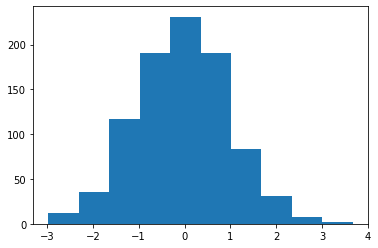

In [10]:
#直方图显示
plt.hist(arr) #设置直方图 
plt.show() #显示图

scipy文档：https://scipy.org/docs.html

## statsmodels
这个非常简单的案例研究旨在让您快速上手 statsmodels。从原始数据开始，我们将展示估计统计模型和绘制诊断图所需的步骤。我们只使用由statsmodels它或它pandas和patsy 依赖项提供的函数。

In [11]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices # patsy用于描述统计模型和使用类似公式构建设计矩阵R
# df = sm.datasets.get_rdataset("uerry", "HistData").data
df = pandas.read_csv('guerry.csv')
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
dept               86 non-null int64
Region             86 non-null object
Department         86 non-null object
Crime_pers         86 non-null int64
Crime_prop         86 non-null int64
Literacy           86 non-null int64
Donations          86 non-null int64
Infants            86 non-null int64
Suicides           86 non-null int64
MainCity           86 non-null object
Wealth             86 non-null int64
Commerce           86 non-null int64
Clergy             86 non-null int64
Crime_parents      86 non-null int64
Infanticide        86 non-null int64
Donation_clergy    86 non-null int64
Lottery            86 non-null int64
Desertion          86 non-null int64
Instruction        86 non-null int64
Prostitutes        86 non-null int64
Distance           86 non-null float64
Area               86 non-null int64
Pop1831            86 non-null float64
dtypes: float64(2), int64(18), object(3

In [13]:
import numpy
#注意，Region列中有一个缺少的观察值。我们使用以下DataFrame方法提供的方法消除它pandas：
df = df.replace(' ',numpy.NaN)
df = df.dropna()
df[-5:]

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
80,85,W,Vendee,20827,7566,28,14035,62486,67963,1:Sm,...,50,44,30,68,79,59,4,212.459,6720,330.36
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


### 设计矩阵
第一个是内源变量矩阵（即依赖，响应，回归等）。

第二个是外生变量矩阵（即独立变量，预测变量，回归量等）。

In [14]:
# 使用patsy的dmatrices函数来创建设计矩阵
#  y 是一个 N×1关于人均彩票投注数据的一栏（彩票）。X 是 N×7带有截距， 识字和财富变量，以及4个区域二进制变量
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [15]:
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


In [16]:
# 模型拟合和总结
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           1.07e-05
Time:                        08:53:49   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [17]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

(0.847233997615691, 0.6997965543621644)


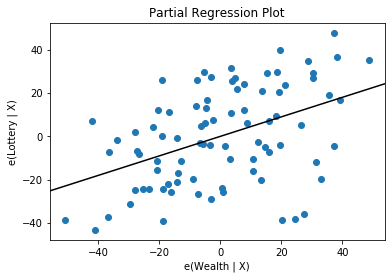

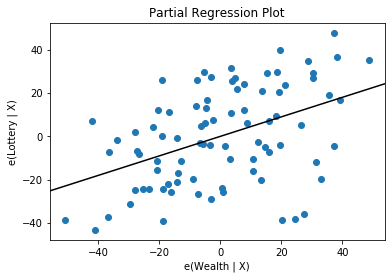

In [18]:
# 应用Rainbow测试线性度
print(sm.stats.linear_rainbow(res))#第一个数字是F统计量，第二个数字是p值。
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                          data=df, obs_labels=False)


Statsmodels文档：http://www.statsmodels.org/stable/gettingstarted.html